In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

### Load the data and examine

In [5]:
data = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
pd.set_option('display.max_columns', 60)
data.head(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

Очень много колонок-признаков. Если внимательно посмотреть на название файлы и  немного посерчить, то можно узнать, что согласно Local Law 84, все постройки Нью-Йорка, площадь которых больше, чем 50 000 квадратных футов обязаны сдавать отчеты о потреблении энергии и воды. Можно найти pdf документа от NYC с описанием всех колонок. 

В данном случае работа предстоит с отчетностью 2016 года. 

Задача - предсказать переменную ENERGY STAR score. По сути, это перцентильный рейтинг с оценкой энергоэффективности постройки. 1 - худший результат, 100 - лучший.

Поскольу это перцентильный рейтинг, ожидается (по крайней мере, в идеале) равномерное распределение таргета (зданий с баллов 10 примерно столько же, сколько зданий с баллов 90). 

### Data types and missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

Если соотнести колонки в обзорной таблички и типы данных по каждой колонки, можно заметить, что некоторые признаки обозначаются как строковые, но на самом деле это числовые признаки. Если еще внимательнее посмотреть, то можно увидеть, что пропущенные данные помечаются как Not Available. В таком случае Pandas конвертирует весь столбец из численного формата в строковый. Поэтому, в первую очередь, заменим эту фразу на Nan.

In [8]:
data = data.replace({'Not Available': np.nan})

In [11]:
for col in list(data.columns):
    if ('ft²' in col or 'kBtu' in col or 'kWh' in col or 'therms' in col 
        or 'Metric Tons CO2e' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [13]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,"11,746.00","11,746.00","11,628.00","11,744.00","3,741.00","1,484.00","11,746.00","11,746.00","11,746.00","9,642.00","11,583.00","10,281.00","10,959.00","9,783.00","10,281.00",9.00,"2,581.00","1,321.00",594.00,16.00,936.00,"10,304.00","9,784.00","11,502.00","10,960.00","11,672.00","11,663.00","11,681.00","11,746.00","7,762.00","7,762.00","11,583.00","9,483.00","9,483.00","9,483.00","9,483.00","9,483.00"
mean,"7,185.76","3,642,958.10","173,269.45","160,552.40","22,778.68","12,016.83","1,948.74",1.29,98.76,59.85,280.07,309.75,11.07,1.90,417.92,"3,395,398.21","3,186,882.38","5,294,367.20","2,429,105.44","1,193,594.47","286,890,690.10","50,485,452.73","536,457.76","5,965,471.81","1,768,751.96","4,553.66","2,477.94","2,076.34","167,373.90","15,917.98",136.17,385.91,40.75,-73.96,7.14,15.77,"4,977.60"
std,"4,323.86","1,049,069.67","336,705.45","309,574.60","55,094.44","27,959.76",30.58,4.02,7.50,29.99,"8,607.18","9,784.73",127.73,97.20,"10,530.52","2,213,236.91","5,497,154.23","5,881,863.24","4,442,945.54","3,558,177.98","3,124,603,263.73","3,914,719,037.61","40,226,060.91","31,544,295.40","9,389,154.02","204,163.88","195,449.81","59,312.95","318,923.76","152,952.43","1,730.73","9,312.74",0.08,0.05,3.95,15.67,"13,520.42"
min,1.00,"7,365.00","50,028.00",54.00,0.00,0.00,"1,600.00",0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,"208,597.30",0.00,0.00,0.00,0.00,"-469,079,690.90",0.00,0.00,0.00,0.00,0.00,0.00,"-23,134.30",0.00,0.00,0.00,0.00,40.52,-74.24,1.00,1.00,1.00
25%,"3,428.25","2,747,221.50","65,240.00","65,201.00","4,000.00","1,720.75","1,927.00",1.00,100.00,37.00,61.80,65.10,3.80,0.10,103.50,"1,663,593.70","255,037.80","2,128,212.80",0.00,"56,980.20","4,320,253.62","1,098,250.80","11,769.52","1,043,672.65","301,997.45",328.70,147.45,94.80,"66,994.00","2,595.40",27.15,99.40,40.71,-73.98,4.00,4.00,100.00
50%,"6,986.50","3,236,403.50","93,138.50","91,324.00","8,654.00","5,000.00","1,941.00",1.00,100.00,65.00,78.50,82.50,5.30,0.50,129.40,"4,328,815.30","1,380,138.00","4,312,984.30",0.00,"207,002.05","9,931,240.20","4,103,962.15","44,455.25","1,855,196.05","541,631.25",500.25,272.60,171.80,"94,080.00","4,692.50",45.09,124.90,40.76,-73.96,7.00,9.00,201.00
75%,"11,054.50","4,409,091.75","159,614.00","153,255.00","20,000.00","12,000.00","1,966.00",1.00,100.00,85.00,97.60,102.50,9.20,0.70,167.20,"4,938,946.70","4,445,807.60","6,514,519.80","4,293,825.33","291,833.17","20,644,966.93","6,855,070.00","73,481.07","4,370,301.50","1,284,676.55",908.42,447.50,424.90,"158,414.00","8,031.88",70.81,162.75,40.82,-73.93,9.00,33.00,531.50
max,"14,993.00","5,991,312.00","13,540,113.00","14,217,119.00","962,428.00","591,640.00","2,019.00",161.00,100.00,100.00,"869,265.00","939,329.00","6,259.40","9,393.00","986,366.00","6,275,849.60","104,684,866.10","79,074,639.00","44,103,779.70","14,351,779.20","71,635,184,100.00","394,285,242,148.00","3,942,852,421.50","1,691,763,

### Missing Values

In [17]:
def missing_value_table(df):
    mis_val = df.isnull().sum()

    mis_val_percent = 100 * mis_val  / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns={0: 'Missing values', 1: '% of total values'})

    mis_val_table = mis_val_table[mis_val_table.iloc[:, 1] != 0].sort_values('% of total values', ascending=False).round(1)

    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table.shape[0]) +
              " columns that have missing values.")
        
    return mis_val_table

In [19]:
missing_values = missing_value_table(data)
missing_values

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing values,% of total values
Fuel Oil #1 Use (kBtu),11737,99.90
Diesel #2 Use (kBtu),11730,99.90
Address 2,11539,98.20
Fuel Oil #5 & 6 Use (kBtu),11152,94.90
District Steam Use (kBtu),10810,92.00
Fuel Oil #4 Use (kBtu),10425,88.80
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.40
3rd Largest Property Use Type,10262,87.40
Fuel Oil #2 Use (kBtu),9165,78.00
2nd Largest Property Use Type,8005,68.20


Я удалю те колонки, где пропущено больше 50% данных. 

In [22]:
missing_columns = list(missing_values[missing_values['% of total values'] > 50].index)
print(f'{len(missing_columns)} признаков будут удалены из датасета.')

11 признаков будут удалены из датасета.


In [23]:
data = data.drop(columns=list(missing_columns))

## EDA

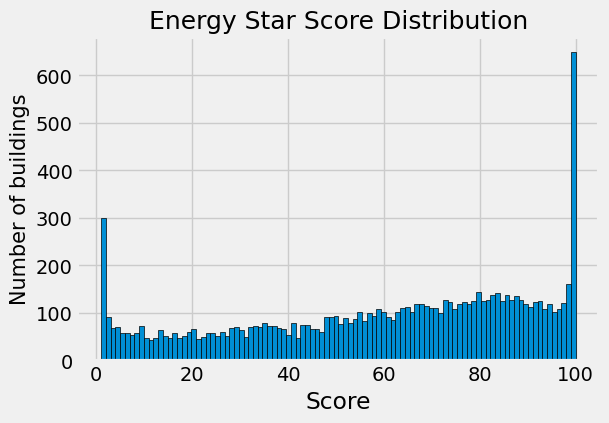

In [30]:
plt.figure(figsize=(6, 4))

data = data.rename(columns = {'ENERGY STAR Score': 'score'})

plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of buildings', fontsize=15)
plt.title('Energy Star Score Distribution', fontsize=18)
plt.show()

Видим, что распределение целевой переменной не равномерное. Самые часто встречающиеся рейтинги - 1 и 100. Скорее всего это связано с тем, что этот показатель указывается фирмами самостоятельно (self-reported), поэтому многие данные могут быть далеки от правды. 

Можно посмотреть на более объективный показатель - Energy Use Intensity, сколько потреблено энергии на квадратный фут здания. 

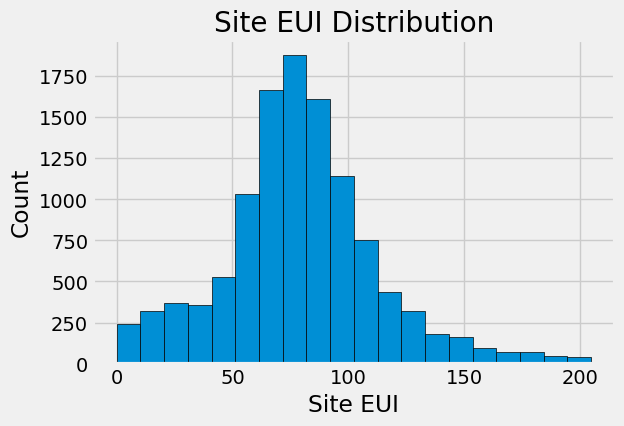

In [39]:
plt.figure(figsize=(6, 4))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')
plt.show()

Видим, что график выглядит странным, скорее всего здесь есть выбросы. 

In [32]:
data['Site EUI (kBtu/ft²)'].describe()

count    11,583.00
mean        280.07
std       8,607.18
min           0.00
25%          61.80
50%          78.50
75%          97.60
max     869,265.00
Name: Site EUI (kBtu/ft²), dtype: float64

In [33]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173    51,328.80
3170    51,831.20
3383    78,360.10
8269    84,969.60
3263    95,560.20
8268   103,562.70
8174   112,173.60
3898   126,307.40
7      143,974.40
8068   869,265.00
Name: Site EUI (kBtu/ft²), dtype: float64

In [34]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,"61,811.00",Multifamily Housing,Multifamily Housing,Multifamily Housing,"56,900.00",2004,1,90,Whole Building,NaN,1.00,"869,265.00","939,329.00",9.90,"9,393.00","986,366.00","49,459,193,300.00","534,458,968.80","1,983,655.60","563,239.60","2,627,199.10","2,627,015.00",184.10,"56,900.00","2,547.90",44.78,"912,801.10",05/01/2017 11:34:14 PM,NaN,In Compliance,40.72,-73.94,1.00,34.00,477.00,East Williamsburg ...


In [35]:
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

iqr = third_quartile - first_quartile

data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

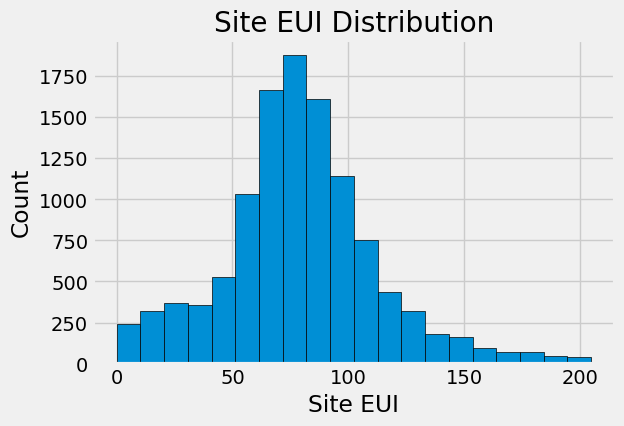

In [38]:
plt.figure(figsize=(6, 4))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')
plt.show()

### Исследуем взаимосвязи

Для того, чтобы посмотреть, как связаны категориальные переменные и целевая переменная, можно построить density plot для каждого типа. 

Будем рассматривать те типы, у которых есть хотя бы 100 измерений. Начнем с Largest Property Use Type.

In [41]:
types = data.dropna(subset='score')
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

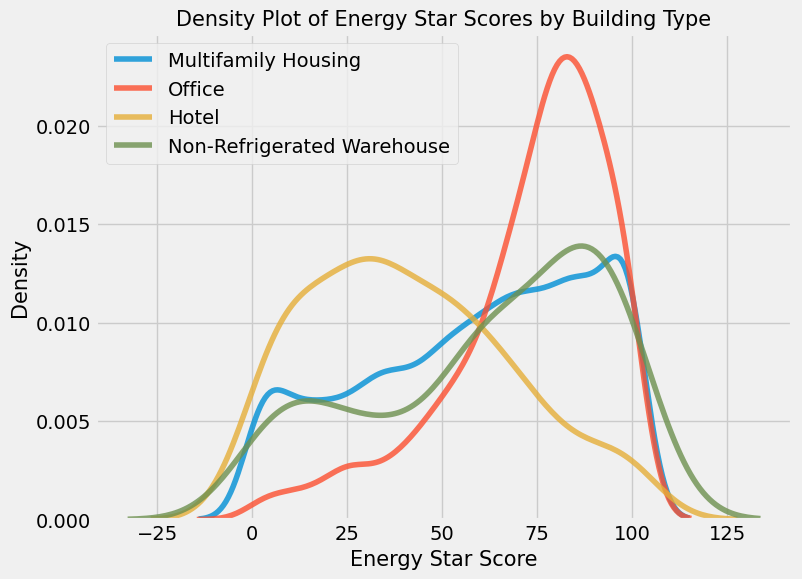

In [50]:
plt.figure(figsize=(8,6))

for b_type in types:
    subset = data[data['Largest Property Use Type'] == b_type]

    sns.kdeplot(subset['score'].dropna(), label=b_type, fill=False, alpha=0.8)

plt.xlabel('Energy Star Score', size = 15)
plt.ylabel('Density', size = 15)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 15)
plt.legend()
plt.show()